In [47]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

warnings.filterwarnings(
    action="ignore", module="scipy", message="^internal gelsd")

df = pd.read_csv(
    'https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')

In [46]:
regr = linear_model.LinearRegression()
Y = df['Sales'].values.reshape(-1, 1)
X = df[['TV', 'Radio','Newspaper']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


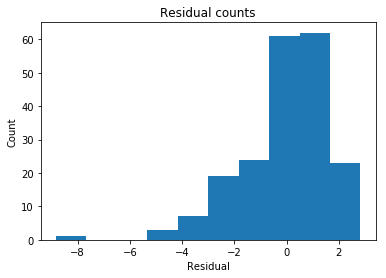

In [66]:
predicted = regr.predict(X).ravel()
actual = df['Sales']
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

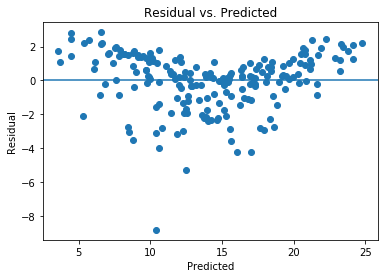

In [63]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [67]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.

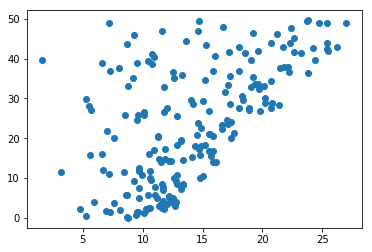

In [38]:
plt.scatter(df['Sales'], df['Radio'])

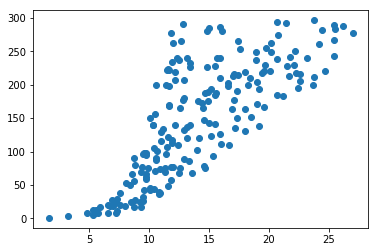

In [39]:
plt.scatter(df['Sales'], df['TV'])

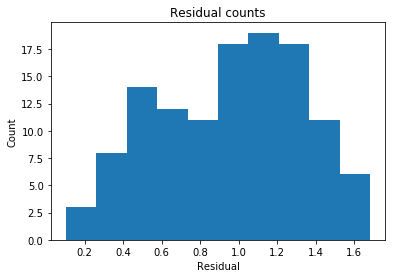

In [45]:
sqrt_residual = [np.sqrt(x) for x in residual]

plt.hist(sqrt_residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

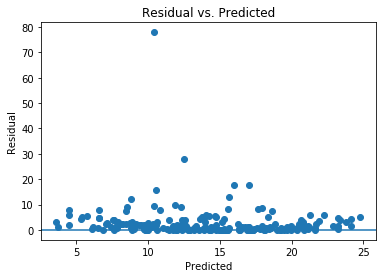

In [62]:
sqrt_residual = [(x)**2 for x in residual]

plt.scatter(predicted, sqrt_residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()